In [1]:
from population import Population
from group_testing import HouseholdGroupTest, MatrixGroupTest
from static_simulation import StaticSimulation
from frequency import frequency

doubling_time = 3.0
alpha = 2 ** (1/doubling_time)
SAR = 0.374

#https://www.statista.com/statistics/242189/disitribution-of-households-in-the-us-by-household-size/
us_household_dist = [0.2837, 0.3451, 0.1507, 0.1276, 0.0578, 0.0226, 0.0125]

beta = 1
FNR = 0.3
FPR = 0.1
uspop = 328E6
tests_per_week_ub = 6E6

tests_per_week_per_person_ub = tests_per_week_ub / uspop


In [2]:
target_prevalence = 0.01

# initial_prevalence depends target_prevalence, SAR, and household-size dist 
# this value was computed elsewhere using monte-carlo estimation of E[target_prevalence]
initial_prevalence = 0.005546875

pop = Population(n_households=22500, # Should be big relative to the largest group size
                      household_size_dist=us_household_dist,
                      target_prevalence=target_prevalence,
                      disease_length=0,
                      time_until_symptomatic=0,
                      non_quarantine_alpha=alpha,
                      daily_secondary_attack_rate=SAR,
                      fatality_pct=0,
                      daily_outside_infection_pct=0,
                      outside_symptomatic_prob=0,
                      initial_quarantine=0,
                        initial_prevalence=initial_prevalence)

group_sizes = list(range(30,151,10))
nreps = 100

In [3]:

sim_outputs = {}
for group_size in group_sizes:
    group_test = HouseholdGroupTest(group_size, 1, FNR, FPR)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed tests/person/week {:.2f}, days between tests {:.2f}, quarantines/person {:.2f}".format(
        group_size, sim_outputs[group_size]['tests_per_person_per_week'], days_between_tests, quarantines_per_person))

sim_outputs_gollier = sim_outputs

For group size 30, computed tests/person/week 0.02, days between tests 9.78, quarantines/person 0.22
For group size 40, computed tests/person/week 0.02, days between tests 10.06, quarantines/person 0.25
For group size 50, computed tests/person/week 0.01, days between tests 10.32, quarantines/person 0.29
For group size 60, computed tests/person/week 0.01, days between tests 10.51, quarantines/person 0.32
For group size 70, computed tests/person/week 0.01, days between tests 10.75, quarantines/person 0.35
For group size 80, computed tests/person/week 0.01, days between tests 11.13, quarantines/person 0.38
For group size 90, computed tests/person/week 0.01, days between tests 11.02, quarantines/person 0.40
For group size 100, computed tests/person/week 0.01, days between tests 11.38, quarantines/person 0.43
For group size 110, computed tests/person/week 0.01, days between tests 11.59, quarantines/person 0.45
For group size 120, computed tests/person/week 0.00, days between tests 11.82, qu

In [4]:
from group_testing import MatrixGroupTest

sim_outputs = {}
for group_size in group_sizes:
    group_test = MatrixGroupTest(group_size, FNR, FPR, fnr_at_swab_level=False)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed tests/person/week {:.2f}, days between tests {:.2f}, quarantines/person {:.2f}".format(
        group_size, sim_outputs[group_size]['tests_per_person_per_week'], days_between_tests, quarantines_per_person))
    
sim_outputs_matrix_swab_false = sim_outputs
    

For group size 30, computed tests/person/week 0.06, days between tests 7.41, quarantines/person 0.06
For group size 40, computed tests/person/week 0.04, days between tests 7.57, quarantines/person 0.07
For group size 50, computed tests/person/week 0.04, days between tests 7.65, quarantines/person 0.09
For group size 60, computed tests/person/week 0.03, days between tests 7.88, quarantines/person 0.11
For group size 70, computed tests/person/week 0.02, days between tests 8.19, quarantines/person 0.13
For group size 80, computed tests/person/week 0.02, days between tests 8.17, quarantines/person 0.15
For group size 90, computed tests/person/week 0.02, days between tests 8.53, quarantines/person 0.17
For group size 100, computed tests/person/week 0.02, days between tests 8.57, quarantines/person 0.19
For group size 110, computed tests/person/week 0.01, days between tests 8.89, quarantines/person 0.21
For group size 120, computed tests/person/week 0.01, days between tests 9.02, quarantines

In [5]:
from group_testing import MatrixGroupTest

sim_outputs = {}
for group_size in group_sizes:
    group_test = MatrixGroupTest(group_size, FNR, FPR, fnr_at_swab_level=True)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed tests/person/week {:.2f}, days between tests {:.2f}, quarantines/person {:.2f}".format(
        group_size, sim_outputs[group_size]['tests_per_person_per_week'], days_between_tests, quarantines_per_person))

    
sim_outputs_matrix_swab_true = sim_outputs    

For group size 30, computed tests/person/week 0.05, days between tests 9.59, quarantines/person 0.06
For group size 40, computed tests/person/week 0.04, days between tests 9.57, quarantines/person 0.08
For group size 50, computed tests/person/week 0.03, days between tests 9.68, quarantines/person 0.09
For group size 60, computed tests/person/week 0.02, days between tests 9.82, quarantines/person 0.11
For group size 70, computed tests/person/week 0.02, days between tests 10.10, quarantines/person 0.13
For group size 80, computed tests/person/week 0.02, days between tests 9.99, quarantines/person 0.15
For group size 90, computed tests/person/week 0.02, days between tests 10.13, quarantines/person 0.17
For group size 100, computed tests/person/week 0.01, days between tests 10.33, quarantines/person 0.20
For group size 110, computed tests/person/week 0.01, days between tests 10.48, quarantines/person 0.22
For group size 120, computed tests/person/week 0.01, days between tests 10.53, quaran

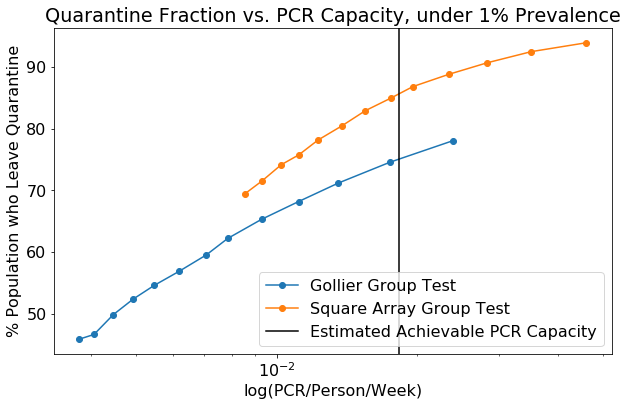

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(10,6))

def add_plot(sim, label):
    plt.plot([sim[group_size]['tests_per_person_per_week'] for group_size in group_sizes],
             [100 * (1 - sim[group_size]['quarantines_per_person']) for group_size in group_sizes],
             label=label, marker='o')

add_plot(sim_outputs_gollier, "Gollier Group Test")
#add_plot(sim_outputs_matrix_swab_false, "Matrix Group Test, Test-level Errors")
add_plot(sim_outputs_matrix_swab_true, "Square Array Group Test")

plt.axvline(tests_per_week_per_person_ub, label="Estimated Achievable PCR Capacity", color='black')


plt.xlabel("log(PCR/Person/Week)")
plt.xscale('log')

plt.ylabel("% Population who Leave Quarantine")

plt.legend(loc='best')

plt.title("Quarantine Fraction vs. PCR Capacity, under 1% Prevalence")
plt.show()

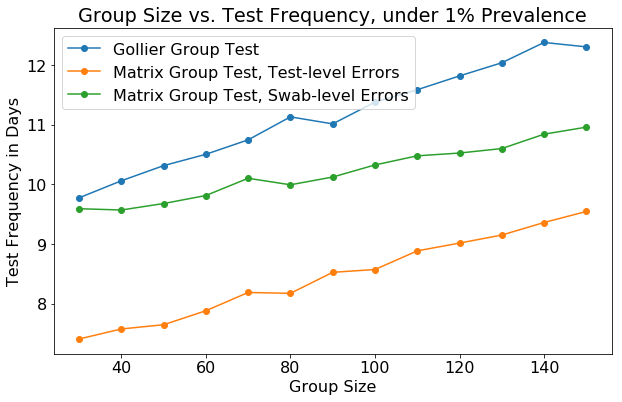

In [9]:
plt.figure(figsize=(10,6))

def add_plot(sim, label):
    plt.plot(group_sizes,
             [sim[group_size]['days_between_tests'] for group_size in group_sizes],
             label=label, marker='o')

add_plot(sim_outputs_gollier, "Gollier Group Test")
add_plot(sim_outputs_matrix_swab_false, "Matrix Group Test, Test-level Errors")
add_plot(sim_outputs_matrix_swab_true, "Matrix Group Test, Swab-level Errors")


plt.xlabel("Group Size")

plt.ylabel("Test Frequency in Days")

plt.legend(loc='best')

plt.title("Group Size vs. Test Frequency, under 1% Prevalence")
plt.show()

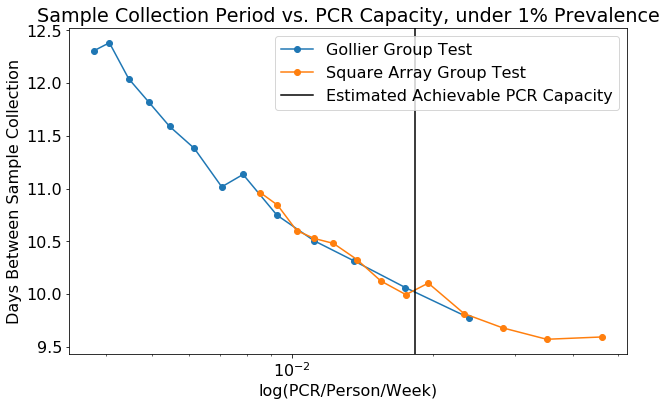

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(10,6))

def add_plot(sim, label):
    plt.plot([sim[group_size]['tests_per_person_per_week'] for group_size in group_sizes],
             [sim[group_size]['days_between_tests'] for group_size in group_sizes],
             label=label, marker='o')

add_plot(sim_outputs_gollier, "Gollier Group Test")
#add_plot(sim_outputs_matrix_swab_false, "Matrix Group Test, Test-level Errors")
add_plot(sim_outputs_matrix_swab_true, "Square Array Group Test")

plt.axvline(tests_per_week_per_person_ub, label="Estimated Achievable PCR Capacity", color='black')

plt.xlabel("log(PCR/Person/Week)")
plt.xscale('log')

plt.ylabel("Days Between Sample Collection")

plt.legend(loc='best')

plt.title("Sample Collection Period vs. PCR Capacity, under 1% Prevalence")
plt.show()

In [18]:
from group_testing import MatrixGroupTest

def recompute_with_beta(sim_outputs, beta):
    for group_size in group_sizes:
        QFNR = sim_outputs[group_size]['QFNR']
        orig_days = sim_outputs[group_size]['days_between_tests']
        orig_tests_per_person = sim_outputs[group_size]['tests_per_person_per_week']
        tests_per_person = orig_tests_per_person * (orig_days / 7.0)
        days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
        sim_outputs[group_size]['days_between_tests_beta_{:.4f}'.format(beta)] = days_between_tests
        sim_outputs[group_size]['tests_per_person_per_week_beta_{:.4f}'.format(beta)] = \
            tests_per_person / (days_between_tests / 7.0)
        
    
beta = 0.5 ** (1/7)

recompute_with_beta(sim_outputs_gollier, beta)
recompute_with_beta(sim_outputs_matrix_swab_true, beta)

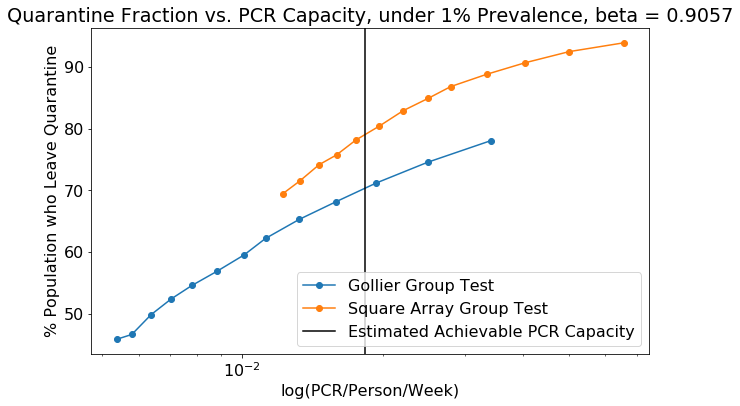

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(10,6))

def add_plot(sim, label, beta):
    plt.plot([sim[group_size]['tests_per_person_per_week_beta_{:.4f}'.format(beta)] for group_size in group_sizes],
             [100 * (1 - sim[group_size]['quarantines_per_person']) for group_size in group_sizes],
             label=label, marker='o')

add_plot(sim_outputs_gollier, "Gollier Group Test", beta)
#add_plot(sim_outputs_matrix_swab_false, "Matrix Group Test, Test-level Errors")
add_plot(sim_outputs_matrix_swab_true, "Square Array Group Test", beta)

plt.axvline(tests_per_week_per_person_ub, label="Estimated Achievable PCR Capacity", color='black')


plt.xlabel("log(PCR/Person/Week)")
plt.xscale('log')

plt.ylabel("% Population who Leave Quarantine")

plt.legend(loc='best')

plt.title("Quarantine Fraction vs. PCR Capacity, under 1% Prevalence, beta = {:.4f}".format(beta))
plt.show()

In [4]:

sim_outputs = {}
for group_size in group_sizes:
    group_test = HouseholdGroupTest(group_size, 1, FNR, FPR)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed tests/person/week {:.2f}, days between tests {:.2f}, quarantines/person {:.2f}".format(
        group_size, sim_outputs[group_size]['tests_per_person_per_week'], days_between_tests, quarantines_per_person))

sim_outputs_gollier = sim_outputs

For group size 30, computed {'QFNR': 0.10276636445767749, 'QFPR': 0.21073810080001373, 'tests_per_person': 0.03328063885267275, 'quarantines_per_person': 0.2175570404172099, 'days_between_tests': 9.847679846237483}
For group size 40, computed {'QFNR': 0.09290743213195345, 'QFPR': 0.2553382817177423, 'tests_per_person': 0.025273732414703577, 'quarantines_per_person': 0.2621296258096456, 'days_between_tests': 10.28418654039267}
For group size 50, computed {'QFNR': 0.09090778848200344, 'QFPR': 0.2771796110797262, 'tests_per_person': 0.02013474652863364, 'quarantines_per_person': 0.2835227179360776, 'days_between_tests': 10.378356863524383}
For group size 60, computed {'QFNR': 0.08675391145150606, 'QFPR': 0.3131289534531966, 'tests_per_person': 0.016815727651156083, 'quarantines_per_person': 0.3192498866586984, 'days_between_tests': 10.580782152580852}
For group size 70, computed {'QFNR': 0.08342123338682005, 'QFPR': 0.3446820205095762, 'tests_per_person': 0.014310802532162548, 'quarantine

In [5]:
for group_size in sim_outputs:
    sim_outputs[group_size]['tests_per_person_per_week'] = sim_outputs[group_size]['tests_per_person'] /\
                                                            (sim_outputs[group_size]['days_between_tests'] / 7)

In [6]:
for group_size in sim_outputs:
    print(group_size)
    print(sim_outputs[group_size])

30
{'QFNR': 0.10276636445767749, 'QFPR': 0.21073810080001373, 'tests_per_person': 0.03328063885267275, 'quarantines_per_person': 0.2175570404172099, 'days_between_tests': 9.847679846237483, 'tests_per_person_per_week': 0.023656787751656888}
40
{'QFNR': 0.09290743213195345, 'QFPR': 0.2553382817177423, 'tests_per_person': 0.025273732414703577, 'quarantines_per_person': 0.2621296258096456, 'days_between_tests': 10.28418654039267, 'tests_per_person_per_week': 0.01720273414023177}
50
{'QFNR': 0.09090778848200344, 'QFPR': 0.2771796110797262, 'tests_per_person': 0.02013474652863364, 'quarantines_per_person': 0.2835227179360776, 'days_between_tests': 10.378356863524383, 'tests_per_person_per_week': 0.013580495212666315}
60
{'QFNR': 0.08675391145150606, 'QFPR': 0.3131289534531966, 'tests_per_person': 0.016815727651156083, 'quarantines_per_person': 0.3192498866586984, 'days_between_tests': 10.580782152580852, 'tests_per_person_per_week': 0.011124895292299432}
70
{'QFNR': 0.08342123338682005, 'QF

In [3]:
from group_testing import MatrixGroupTest

group_sizes = list(range(70,131,10))
nreps = 100
sim_outputs = {}
for group_size in group_sizes:
    group_test = MatrixGroupTest(group_size, FNR, FPR)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed {}".format(group_size, sim_outputs[group_size]))

For group size 70, computed {'QFNR': 0.153000623016844, 'QFPR': 0.11719012307923789, 'tests_per_person_per_week': 0.02445778684698166, 'quarantines_per_person': 0.12458275382475661, 'days_between_tests': 8.125171701957694}
For group size 80, computed {'QFNR': 0.14718385255967814, 'QFPR': 0.13817634837362255, 'tests_per_person_per_week': 0.02169331276406352, 'quarantines_per_person': 0.1454300676232888, 'days_between_tests': 8.292926075706527}
For group size 90, computed {'QFNR': 0.14586530372388803, 'QFPR': 0.1565318917326574, 'tests_per_person_per_week': 0.019087103187033525, 'quarantines_per_person': 0.16359340659340657, 'days_between_tests': 8.33187401320144}
For group size 100, computed {'QFNR': 0.1360501390456523, 'QFPR': 0.17780754382728683, 'tests_per_person_per_week': 0.016074431799255124, 'quarantines_per_person': 0.18461522900145655, 'days_between_tests': 8.633368991517381}
For group size 110, computed {'QFNR': 0.1290620583647571, 'QFPR': 0.19734529037630882, 'tests_per_perso

In [3]:
from group_testing import MatrixGroupTest

group_sizes = list(range(70,131,10))
nreps = 100
sim_outputs = {}
for group_size in group_sizes:
    group_test = MatrixGroupTest(group_size, FNR, FPR, fnr_at_swab_level=True)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed {}".format(group_size, sim_outputs[group_size]))

For group size 70, computed {'QFNR': 0.10271301869833083, 'QFPR': 0.12098442648091395, 'tests_per_person_per_week': 0.020232320910583565, 'quarantines_per_person': 0.12876989988511406, 'days_between_tests': 9.84992712758539}
For group size 80, computed {'QFNR': 0.09918543674226371, 'QFPR': 0.143266811200124, 'tests_per_person_per_week': 0.017772196435143627, 'quarantines_per_person': 0.1509381750010189, 'days_between_tests': 10.001183647470558}
For group size 90, computed {'QFNR': 0.09393880185361685, 'QFPR': 0.1643759715010788, 'tests_per_person_per_week': 0.015599058237696514, 'quarantines_per_person': 0.1719315623592976, 'days_between_tests': 10.236404990928024}
For group size 100, computed {'QFNR': 0.09655096826321825, 'QFPR': 0.1801297721668356, 'tests_per_person_per_week': 0.013804461888906182, 'quarantines_per_person': 0.18734872546624318, 'days_between_tests': 10.117696387294933}
For group size 110, computed {'QFNR': 0.09265464511141336, 'QFPR': 0.206554429861259, 'tests_per_pe

In [4]:
group_sizes = list(range(140,211,10))
nreps = 100
sim_outputs = {}
for group_size in group_sizes:
    group_test = MatrixGroupTest(group_size, FNR, FPR, fnr_at_swab_level=True)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed {}".format(group_size, sim_outputs[group_size]))

For group size 140, computed {'QFNR': 0.40673976999761285, 'QFPR': 0.13514212607005924, 'tests_per_person_per_week': 0.02600250742152804, 'quarantines_per_person': 0.1398124720335191, 'days_between_tests': 3.8934661022309607}
For group size 150, computed {'QFNR': 0.4152326569665395, 'QFPR': 0.13552690066758172, 'tests_per_person_per_week': 0.025815470796817314, 'quarantines_per_person': 0.13997931789610285, 'days_between_tests': 3.804024547570876}
For group size 160, computed {'QFNR': 0.4050563809269398, 'QFPR': 0.14952401674718815, 'tests_per_person_per_week': 0.024602061362369844, 'quarantines_per_person': 0.15404169221336603, 'days_between_tests': 3.911416080504153}
For group size 170, computed {'QFNR': 0.3950376812168409, 'QFPR': 0.16664730787822002, 'tests_per_person_per_week': 0.02184971881053933, 'quarantines_per_person': 0.17105169340463458, 'days_between_tests': 4.019813464702735}
For group size 180, computed {'QFNR': 0.39395867840390586, 'QFPR': 0.1770805629039877, 'tests_per

In [5]:
group_sizes = list(range(220,281,10))
nreps = 100
sim_outputs = {}
for group_size in group_sizes:
    group_test = MatrixGroupTest(group_size, FNR, FPR, fnr_at_swab_level=True)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed {}".format(group_size, sim_outputs[group_size]))

For group size 220, computed {'QFNR': 0.37297818990297676, 'QFPR': 0.20896730261201765, 'tests_per_person_per_week': 0.017954111537017495, 'quarantines_per_person': 0.21316321933237764, 'days_between_tests': 4.268510472888974}
For group size 230, computed {'QFNR': 0.35935079026464417, 'QFPR': 0.23206797110531135, 'tests_per_person_per_week': 0.016645574840612642, 'quarantines_per_person': 0.23619876543209878, 'days_between_tests': 4.429605708385351}
For group size 240, computed {'QFNR': 0.35675326480136327, 'QFPR': 0.24919528739331884, 'tests_per_person_per_week': 0.014678439391766955, 'quarantines_per_person': 0.2531605987055016, 'days_between_tests': 4.461004387223856}
For group size 250, computed {'QFNR': 0.35738660188106974, 'QFPR': 0.24963832124291851, 'tests_per_person_per_week': 0.012692141780663429, 'quarantines_per_person': 0.25355969154992125, 'days_between_tests': 4.453327634702847}
For group size 260, computed {'QFNR': 0.336152784023735, 'QFPR': 0.2639610053914191, 'tests_p